In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ejercicio 4. Estrellas


## Inciso A

In [2]:
data = pd.read_csv(r'.\estrellas.csv')
data

,Edad,Temperatura,clase
0,10,6200,0
1,14,3000,0
2,-155,6600,0
3,-60,3450,0
4,120,6100,0
5,-300,2500,0
6,16,1400,1
7,-10,2300,1
8,-32,1900,1
9,2,6600,1


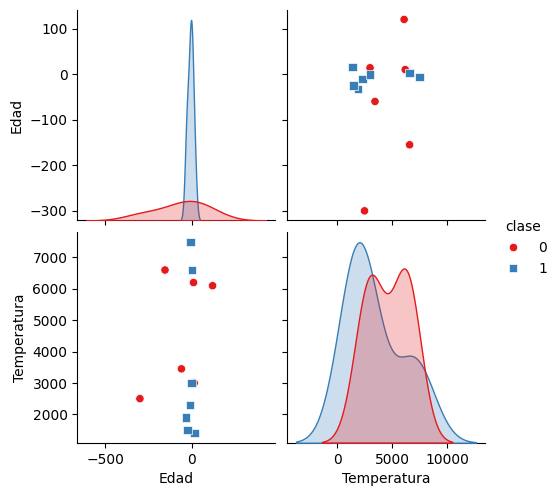

In [8]:
import seaborn as sns
# Fix the column name by stripping leading/trailing spaces
data.columns = data.columns.str.strip()

# Use the corrected column name
sns.pairplot(data, hue='clase', palette='Set1', diag_kind='kde', markers=["o", "s"])
plt.show()

In [4]:
# ver rango de columna Edad
print(data['Edad'].min())
print(data['Edad'].max())
print(data['Edad'].mean())
print(data['Edad'].median()) 

-300
120
-32.92307692307692
-7.0


In [5]:
data['Edad_bin'], bins = pd.qcut(data['Edad'], q=2, labels=['Baja', 'Alta'], retbins=True)

In [6]:
data

,Edad,Temperatura,clase,Edad_bin
0,10,6200,0,Alta
1,14,3000,0,Alta
2,-155,6600,0,Baja
3,-60,3450,0,Baja
4,120,6100,0,Alta
5,-300,2500,0,Baja
6,16,1400,1,Alta
7,-10,2300,1,Baja
8,-32,1900,1,Baja
9,2,6600,1,Alta


In [7]:
print('Rangos de los intervalos: ', bins)
conteo_intervalos = data['Edad_bin'].value_counts()
print('Cantidad de ejemplos en cada intervalo:\n', conteo_intervalos)

Rangos de los intervalos:  [-300.   -7.  120.]
Cantidad de ejemplos en cada intervalo:
 Edad_bin
Baja    7
Alta    6
Name: count, dtype: int64


# 5. Ejercicio Integrador: Ofertas de Trabajo 

In [8]:
df = pd.read_excel(r'trabajos.xlsx')
df

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,667,Data Scientist,$105K-$167K (Glassdoor est.),Summary\n\nWe’re looking for a data scientist ...,3.6,TRANZACT\n3.6,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,-1
668,668,Data Scientist,$105K-$167K (Glassdoor est.),Job Description\nBecome a thought leader withi...,-1.0,JKGT,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1
669,669,Data Scientist,$105K-$167K (Glassdoor est.),Join a thriving company that is changing the w...,-1.0,AccessHope,"Irwindale, CA",-1,-1,-1,-1,-1,-1,-1,-1
670,670,Data Scientist,$105K-$167K (Glassdoor est.),100 Remote Opportunity As an AINLP Data Scient...,5.0,ChaTeck Incorporated\n5.0,"San Francisco, CA","Santa Clara, CA",1 to 50 employees,-1,Company - Private,Advertising & Marketing,Business Services,$1 to $5 million (USD),-1


## Inciso A

In [9]:
# Mostrar solo las columnas Job Title y Job Description
df[['Job Title', 'Job Description']] 

,Job Title,Job Description
0,Sr Data Scientist,Description\n\nThe Senior Data Scientist is re...
1,Data Scientist,"Secure our Nation, Ignite your Future\n\nJoin ..."
2,Data Scientist,Overview\n\n\nAnalysis Group is one of the lar...
3,Data Scientist,JOB DESCRIPTION:\n\nDo you have a passion for ...
4,Data Scientist,Data Scientist\nAffinity Solutions / Marketing...
...,...,...
667,Data Scientist,Summary\n\nWe’re looking for a data scientist ...
668,Data Scientist,Job Description\nBecome a thought leader withi...
669,Data Scientist,Join a thriving company that is changing the w...
670,Data Scientist,100 Remote Opportunity As an AINLP Data Scient...


## Inciso B

In [10]:
df.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

In [11]:
# Eliminar columnas index, Competitors, Company Name
df = df.drop(['index', 'Competitors', 'Company Name'], axis=1)

In [12]:
df

,Job Title,Salary Estimate,Job Description,Rating,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable
1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD)
2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD)
3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD)
4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable
...,...,...,...,...,...,...,...,...,...,...,...,...
667,Data Scientist,$105K-$167K (Glassdoor est.),Summary\n\nWe’re looking for a data scientist ...,3.6,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable
668,Data Scientist,$105K-$167K (Glassdoor est.),Job Description\nBecome a thought leader withi...,-1.0,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1
669,Data Scientist,$105K-$167K (Glassdoor est.),Join a thriving company that is changing the w...,-1.0,"Irwindale, CA",-1,-1,-1,-1,-1,-1,-1
670,Data Scientist,$105K-$167K (Glassdoor est.),100 Remote Opportunity As an AINLP Data Scient...,5.0,"San Francisco, CA","Santa Clara, CA",1 to 50 employees,-1,Company - Private,Advertising & Marketing,Business Services,$1 to $5 million (USD)


In [13]:
df.describe()

,Rating,Founded
count,672.000000,672.000000
mean,3.518601,1635.529762
std,1.410329,756.746640
min,-1.000000,-1.000000
25%,3.300000,1917.750000
50%,3.800000,1995.000000
75%,4.300000,2009.000000
max,5.000000,2019.000000


## Inciso C
### a) Crear columna de sueldo minimo

In [14]:
# Crear columna de sueldo minimo y máximo
df['Salary Estimate'].unique()


array(['$137K-$171K (Glassdoor est.)', '$75K-$131K (Glassdoor est.)',
       '$79K-$131K (Glassdoor est.)', '$99K-$132K (Glassdoor est.)',
       '$90K-$109K (Glassdoor est.)', '$101K-$165K (Glassdoor est.)',
       '$56K-$97K (Glassdoor est.)', '$79K-$106K (Glassdoor est.)',
       '$71K-$123K (Glassdoor est.)', '$90K-$124K (Glassdoor est.)',
       '$91K-$150K (Glassdoor est.)', '$141K-$225K (Glassdoor est.)',
       '$145K-$225K(Employer est.)', '$79K-$147K (Glassdoor est.)',
       '$122K-$146K (Glassdoor est.)', '$112K-$116K (Glassdoor est.)',
       '$110K-$163K (Glassdoor est.)', '$124K-$198K (Glassdoor est.)',
       '$79K-$133K (Glassdoor est.)', '$69K-$116K (Glassdoor est.)',
       '$31K-$56K (Glassdoor est.)', '$95K-$119K (Glassdoor est.)',
       '$212K-$331K (Glassdoor est.)', '$66K-$112K (Glassdoor est.)',
       '$128K-$201K (Glassdoor est.)', '$138K-$158K (Glassdoor est.)',
       '$80K-$132K (Glassdoor est.)', '$87K-$141K (Glassdoor est.)',
       '$92K-$155K (Glassdo

In [15]:
# Eliminar el texto de la columna
df['Salary Estimate'] = df['Salary Estimate'].str.replace(' (Glassdoor est.)', '')
# Crear columna de sueldo minimo
df['Salary Min'] = df['Salary Estimate'].str.split('-').str[0].str.replace('$', '').str.replace('K', '').astype('float')

In [16]:
df['Salary Min'].describe()
#print(df['Salary Min'].value_counts())

count    672.000000
mean      99.196429
std       33.009958
min       31.000000
25%       79.000000
50%       91.000000
75%      122.000000
max      212.000000
Name: Salary Min, dtype: float64

### b) Crear columna de sueldo maximo

In [17]:
# Eliminar el texto de la columna
df['Salary Estimate'] = df['Salary Estimate'].str.replace(' (Glassdoor est.)', '').str.replace('(Employer est.)', '')
# Crear columna de sueldo maximo
df['Salary Max'] = df['Salary Estimate'].str.split('-').str[1].str.replace('$', '').str.replace('K', '').astype('float')

In [18]:
df['Salary Max'].describe()

count    672.000000
mean     148.130952
std       48.035110
min       56.000000
25%      119.000000
50%      133.000000
75%      165.000000
max      331.000000
Name: Salary Max, dtype: float64

### c) Crear columna de sueldo promedio

In [19]:
# Crear columna de salario promedio
df['Salary Avg'] = (df['Salary Min'] + df['Salary Max']) / 2
df

,Job Title,Salary Estimate,Job Description,Rating,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Salary Min,Salary Max,Salary Avg
0,Sr Data Scientist,$137K-$171K,Description\n\nThe Senior Data Scientist is re...,3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,137.0,171.0,154.0
1,Data Scientist,$137K-$171K,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),137.0,171.0,154.0
2,Data Scientist,$137K-$171K,Overview\n\n\nAnalysis Group is one of the lar...,3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),137.0,171.0,154.0
3,Data Scientist,$137K-$171K,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),137.0,171.0,154.0
4,Data Scientist,$137K-$171K,Data Scientist\nAffinity Solutions / Marketing...,2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,137.0,171.0,154.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,Data Scientist,$105K-$167K,Summary\n\nWe’re looking for a data scientist ...,3.6,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,105.0,167.0,136.0
668,Data Scientist,$105K-$167K,Job Description\nBecome a thought leader withi...,-1.0,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,105.0,167.0,136.0
669,Data Scientist,$105K-$167K,Join a thriving company that is changing the w...,-1.0,"Irwindale, CA",-1,-1,-1,-1,-1,-1,-1,105.0,167.0,136.0
670,Data Scientist,$105K-$167K,100 Remote Opportunity As an AINLP Data Scient...,5.0,"San Francisco, CA","Santa Clara, CA",1 to 50 employees,-1,Company - Private,Advertising & Marketing,Business Services,$1 to $5 million (USD),105.0,167.0,136.0


In [20]:
df = df.drop(columns=['Salary Estimate'])

### d) Crear columna de Ubicación 
Del trabajo, codificada como el código del estado de dos letras (por ej, NY o MA), sin la ciudad. 
Quitar el resto de los atributos de ubicación (Location y Headquarters)

In [21]:
df['Location'].unique()

array(['New York, NY', 'Chantilly, VA', 'Boston, MA', 'Newton, MA',
       'Santa Barbara, CA', 'Cambridge, MA', 'Bedford, MA',
       'San Diego, CA', 'Chicago, IL', 'Herndon, VA', 'Saint Louis, MO',
       'Richland, WA', 'Northbrook, IL', 'Washington, DC', 'Remote',
       'Memphis, TN', 'Plano, TX', 'West Grove, PA', 'Phoenix, AZ',
       'Appleton, WI', 'Atlanta, GA', 'Orlando, FL', 'Lexington, MA',
       'McLean, VA', 'San Francisco, CA', 'Sheboygan, WI',
       'United States', 'Bothell, WA', 'Lincoln, NE', 'Overland Park, KS',
       'Santa Monica, CA', 'Portsmouth, NH', 'Ewing, NJ',
       'South San Francisco, CA', 'Palo Alto, CA', 'Bellevue, WA',
       'New Orleans, LA', 'Akron, OH', 'Fort Wayne, IN', 'Woburn, MA',
       'Carson, CA', 'Coral Gables, FL', 'Santa Clara, CA',
       'Brisbane, CA', 'Winter Park, FL', 'Redwood City, CA',
       'Peoria, IL', 'Ipswich, MA', 'Carmel, IN', 'Emeryville, CA',
       'Gaithersburg, MD', 'Longmont, CO', 'Austin, TX', 'Yakima, WA',
 

In [22]:
df['Ubicacion'] = df['Location'].apply(lambda x: x.split(',')[1].strip() if ',' in x else x)


In [23]:
df['Ubicacion'].unique()

array(['NY', 'VA', 'MA', 'CA', 'IL', 'MO', 'WA', 'DC', 'Remote', 'TN',
       'TX', 'PA', 'AZ', 'WI', 'GA', 'FL', 'United States', 'NE', 'KS',
       'NH', 'NJ', 'LA', 'OH', 'IN', 'MD', 'CO', 'Utah', 'New Jersey',
       'UT', 'OR', 'MI', 'SC', 'MS', 'AL', 'RI', 'IA', 'MN', 'OK', 'CT',
       'NC', 'Texas', 'DE', 'Anne Arundel', 'California', 'WV'],
      dtype=object)

In [24]:
# Cambiar los valores de Ubicacion de New Jersey a NJ, California a CA, Texas a TX, etc. Quedó medio manual pero no le encontré otra forma
df['Ubicacion'] = df['Ubicacion'].replace({'New Jersey': 'NJ', 'California': 'CA', 'Texas': 'TX', 'United States': 'US', 'Utah': 'UT', "Anne Arundel": "MD"})  
df['Ubicacion'].unique()

array(['NY', 'VA', 'MA', 'CA', 'IL', 'MO', 'WA', 'DC', 'Remote', 'TN',
       'TX', 'PA', 'AZ', 'WI', 'GA', 'FL', 'US', 'NE', 'KS', 'NH', 'NJ',
       'LA', 'OH', 'IN', 'MD', 'CO', 'UT', 'OR', 'MI', 'SC', 'MS', 'AL',
       'RI', 'IA', 'MN', 'OK', 'CT', 'NC', 'DE', 'WV'], dtype=object)

In [25]:
df = df.drop(['Location'], axis=1)
df = df.drop(['Headquarters'], axis=1)

### e) Antigüedad de la empresa
Codificada como número, en base a la Fecha de fundación. 

Quitar la fecha de fundación.


In [26]:
# Columna de  Antiguedad de la empresa
df['Antiguedad'] = (2025 - df['Founded']).astype('int')

In [27]:
# Eliminar la fecha de fundacion
df = df.drop(['Founded'], axis=1)

In [28]:
df

,Job Title,Job Description,Rating,Size,Type of ownership,Industry,Sector,Revenue,Salary Min,Salary Max,Salary Avg,Ubicacion,Antiguedad
0,Sr Data Scientist,Description\n\nThe Senior Data Scientist is re...,3.1,1001 to 5000 employees,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,137.0,171.0,154.0,NY,32
1,Data Scientist,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,5001 to 10000 employees,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),137.0,171.0,154.0,VA,57
2,Data Scientist,Overview\n\n\nAnalysis Group is one of the lar...,3.8,1001 to 5000 employees,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),137.0,171.0,154.0,MA,44
3,Data Scientist,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,501 to 1000 employees,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),137.0,171.0,154.0,MA,25
4,Data Scientist,Data Scientist\nAffinity Solutions / Marketing...,2.9,51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,137.0,171.0,154.0,NY,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,Data Scientist,Summary\n\nWe’re looking for a data scientist ...,3.6,1001 to 5000 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,105.0,167.0,136.0,NJ,36
668,Data Scientist,Job Description\nBecome a thought leader withi...,-1.0,-1,-1,-1,-1,-1,105.0,167.0,136.0,CA,2026
669,Data Scientist,Join a thriving company that is changing the w...,-1.0,-1,-1,-1,-1,-1,105.0,167.0,136.0,CA,2026
670,Data Scientist,100 Remote Opportunity As an AINLP Data Scient...,5.0,1 to 50 employees,Company - Private,Advertising & Marketing,Business Services,$1 to $5 million (USD),105.0,167.0,136.0,CA,2026


### f) Senior: (binaria)
Si el trabajo es para una persona con mucha experiencia (atributo binario)

Nota: Para identificar si un trabajo es “Senior”, consultar si los atributos
“Job Title” o “Job Description” contienen las palabras: “Senior”, “Sr”, “Sr.”,
¿Qué otras palabras se te ocurren para mejorar este atributo?


In [29]:
# Crear columna binaria (booleana?) de Seniority, segun si aparece la palabra Senior o Sr. en la columna Job Title y Job Description
palabras_clave = 'Senior|Sr.|Sr|Lead|Expert|Principal|Director|Chief'
df['Seniority'] = df['Job Title'].str.contains(palabras_clave)
df['Seniority'] = df['Seniority'] | df['Job Description'].str.contains(palabras_clave)
df['Seniority'] = df['Seniority'].astype('int') # No se si poner tipo booleano o entero

# Hay varias palabras (como Expert / Lead / Principal, etc) que tambien podrian indicar Seniority

In [30]:
df

,Job Title,Job Description,Rating,Size,Type of ownership,Industry,Sector,Revenue,Salary Min,Salary Max,Salary Avg,Ubicacion,Antiguedad,Seniority
0,Sr Data Scientist,Description\n\nThe Senior Data Scientist is re...,3.1,1001 to 5000 employees,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,137.0,171.0,154.0,NY,32,1
1,Data Scientist,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,5001 to 10000 employees,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),137.0,171.0,154.0,VA,57,1
2,Data Scientist,Overview\n\n\nAnalysis Group is one of the lar...,3.8,1001 to 5000 employees,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),137.0,171.0,154.0,MA,44,0
3,Data Scientist,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,501 to 1000 employees,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),137.0,171.0,154.0,MA,25,0
4,Data Scientist,Data Scientist\nAffinity Solutions / Marketing...,2.9,51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,137.0,171.0,154.0,NY,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,Data Scientist,Summary\n\nWe’re looking for a data scientist ...,3.6,1001 to 5000 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,105.0,167.0,136.0,NJ,36,0
668,Data Scientist,Job Description\nBecome a thought leader withi...,-1.0,-1,-1,-1,-1,-1,105.0,167.0,136.0,CA,2026,0
669,Data Scientist,Join a thriving company that is changing the w...,-1.0,-1,-1,-1,-1,-1,105.0,167.0,136.0,CA,2026,0
670,Data Scientist,100 Remote Opportunity As an AINLP Data Scient...,5.0,1 to 50 employees,Company - Private,Advertising & Marketing,Business Services,$1 to $5 million (USD),105.0,167.0,136.0,CA,2026,0


### g) Junior: (binaria)
si el trabajo es para una persona con poca experiencia (atributo binario).

Nota: Para identificar si un trabajo es “Junior”, consultar si los atributos
“Job Title” o “Job Description” contienen las palabras: “Junior” o “Jr”. ¿Qué
otras palabras se te ocurren para mejorar este atributo

In [31]:
# Crear columna Junior segun si aparece la palabra Junior o Jr. en la columna Job Title y Job Description
palabras_clave = 'Junior|Jr.|Jr|Early|Entry|Beginner'
df['Junior'] = df['Job Title'].str.contains(palabras_clave)
df['Junior'] = df['Junior'] | df['Job Description'].str.contains(palabras_clave)
df['Junior'] = df['Junior'].astype('int') # No se si poner tipo booleano o entero acá tmp

In [32]:
df

,Job Title,Job Description,Rating,Size,Type of ownership,Industry,Sector,Revenue,Salary Min,Salary Max,Salary Avg,Ubicacion,Antiguedad,Seniority,Junior
0,Sr Data Scientist,Description\n\nThe Senior Data Scientist is re...,3.1,1001 to 5000 employees,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,137.0,171.0,154.0,NY,32,1,0
1,Data Scientist,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,5001 to 10000 employees,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),137.0,171.0,154.0,VA,57,1,0
2,Data Scientist,Overview\n\n\nAnalysis Group is one of the lar...,3.8,1001 to 5000 employees,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),137.0,171.0,154.0,MA,44,0,0
3,Data Scientist,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,501 to 1000 employees,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),137.0,171.0,154.0,MA,25,0,0
4,Data Scientist,Data Scientist\nAffinity Solutions / Marketing...,2.9,51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,137.0,171.0,154.0,NY,27,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,Data Scientist,Summary\n\nWe’re looking for a data scientist ...,3.6,1001 to 5000 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,105.0,167.0,136.0,NJ,36,0,0
668,Data Scientist,Job Description\nBecome a thought leader withi...,-1.0,-1,-1,-1,-1,-1,105.0,167.0,136.0,CA,2026,0,0
669,Data Scientist,Join a thriving company that is changing the w...,-1.0,-1,-1,-1,-1,-1,105.0,167.0,136.0,CA,2026,0,0
670,Data Scientist,100 Remote Opportunity As an AINLP Data Scient...,5.0,1 to 50 employees,Company - Private,Advertising & Marketing,Business Services,$1 to $5 million (USD),105.0,167.0,136.0,CA,2026,0,0


Revisando, veo que varios que estan marcados como Junior, también están como Seniority. Algo está mal evidentemente (quizas haya q cambiar las palabras clave)

### h) “Public” y “Private”
Atributos binarios en base al atributo “Type of ownership”. 
Eliminar ese atributo

In [33]:
df['Type of ownership'].unique()

array(['Nonprofit Organization', 'Company - Public',
       'Private Practice / Firm', 'Company - Private', 'Government',
       'Subsidiary or Business Segment', 'Other Organization', -1,
       'Unknown', 'Hospital', 'Self-employed', 'College / University',
       'Contract'], dtype=object)

In [34]:
# Rellenar NaN con una cadena vacía para evitar errores
df['Type of ownership'] = df['Type of ownership'].fillna('')
# Crear columna de si la empresa es privada o no segun si aparece la palabra Private en la columna Type of ownership
df['Private'] = df['Type of ownership'].str.contains('Private|Self-employed').fillna(False).astype('int')
df['Public'] = df['Type of ownership'].str.contains('Public|Government').fillna(False).astype('int')
# Los demás no sé si cómo clasificarlos

C:\Users\Usuario\AppData\Local\Temp\ipykernel_10476\783341601.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Private'] = df['Type of ownership'].str.contains('Private|Self-employed').fillna(False).astype('int')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_10476\783341601.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Public'] = df['Type of ownership'].str.contains('Public|Government').fillna(False).astype('int')


Faltaron clasificar algunos

In [35]:
df

,Job Title,Job Description,Rating,Size,Type of ownership,Industry,Sector,Revenue,Salary Min,Salary Max,Salary Avg,Ubicacion,Antiguedad,Seniority,Junior,Private,Public
0,Sr Data Scientist,Description\n\nThe Senior Data Scientist is re...,3.1,1001 to 5000 employees,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,137.0,171.0,154.0,NY,32,1,0,0,0
1,Data Scientist,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,5001 to 10000 employees,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),137.0,171.0,154.0,VA,57,1,0,0,1
2,Data Scientist,Overview\n\n\nAnalysis Group is one of the lar...,3.8,1001 to 5000 employees,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),137.0,171.0,154.0,MA,44,0,0,1,0
3,Data Scientist,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,501 to 1000 employees,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),137.0,171.0,154.0,MA,25,0,0,0,1
4,Data Scientist,Data Scientist\nAffinity Solutions / Marketing...,2.9,51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,137.0,171.0,154.0,NY,27,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,Data Scientist,Summary\n\nWe’re looking for a data scientist ...,3.6,1001 to 5000 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,105.0,167.0,136.0,NJ,36,0,0,1,0
668,Data Scientist,Job Description\nBecome a thought leader withi...,-1.0,-1,-1,-1,-1,-1,105.0,167.0,136.0,CA,2026,0,0,0,0
669,Data Scientist,Join a thriving company that is changing the w...,-1.0,-1,-1,-1,-1,-1,105.0,167.0,136.0,CA,2026,0,0,0,0
670,Data Scientist,100 Remote Opportunity As an AINLP Data Scient...,5.0,1 to 50 employees,Company - Private,Advertising & Marketing,Business Services,$1 to $5 million (USD),105.0,167.0,136.0,CA,2026,0,0,1,0


### i) “Estimated size” y “Estimated revenue” 
en base a “Size” y “Revenue”, pero los nuevos atributos deben ser numéricos, y deben corresponder al
máximo de los valores que aparecen de forma textual en el atributo. 

Por ejemplo, si el valor textual es 100 to 500 million (USD), el valor numérico debería ser 500.000.000. 
En el caso de empresas que no tienen este valor, reemplazar por el promedio.


In [36]:
# Nueva Columna Estimated Size (maximo que aparece en la columna Size que es de tipo texto)
df['Size'].unique()
# Supongamos que tu DataFrame se llama df y la columna es 'Size'
def extract_max_size(size):
    if isinstance(size, str) and 'to' in size:
        # Dividir la cadena y seleccionar el tercer elemento
        max_size = size.split()[2]
        # Eliminar cualquier carácter no numérico
        max_size = ''.join(filter(str.isdigit, max_size))
        return int(max_size)
    else:
        # Si no hay 'to', verificar si contiene la palabra 'employees'
        if isinstance(size, str) and 'employees' in size:
            return 10000
        else:
            return 0

# Aplicar la función a la columna 'Size' y crear la nueva columna 'Estimated Size'
df['Estimated Size'] = df['Size'].apply(extract_max_size)

In [37]:
# Calcular promedio de Estimated Size sin tener en cuenta los 0
prom_size = round(df['Estimated Size'][df['Estimated Size'] != 0].mean(),0)
# Rellenar los 0 con el promedio
df['Estimated Size'] = df['Estimated Size'].replace(0, prom_size)

In [38]:
df['Revenue'].unique()

array(['Unknown / Non-Applicable', '$1 to $2 billion (USD)',
       '$100 to $500 million (USD)', '$10+ billion (USD)',
       '$2 to $5 billion (USD)', '$500 million to $1 billion (USD)',
       '$5 to $10 billion (USD)', '$10 to $25 million (USD)',
       '$25 to $50 million (USD)', '$50 to $100 million (USD)',
       '$1 to $5 million (USD)', '$5 to $10 million (USD)',
       'Less than $1 million (USD)', -1], dtype=object)

In [39]:
def extract_max_rev(size):
    if isinstance(size, str) and 'to' in size:
        max_rev = size.split('to')[1]
        # Eliminar cualquier caracter no numerico
        max_rev = ''.join(filter(str.isdigit, max_rev))
        # Si size contiene la palabra million, devolver el valor por e6, si contiene billion por e9
        if 'million' in size:
            return int(max_rev) * 10**6
        elif 'billion' in size:
            return int(max_rev) * 10**9
        else:
            return 'Problemas CHEQUEAR'
        
    elif isinstance(size, str) and '$' in size:
        max_rev = size.split('$')[1]
        # Eliminar cualquier caracter no numerico
        max_rev = ''.join(filter(str.isdigit, max_rev))
        # Si size contiene la palabra million, devolver el valor por e6, si contiene billion por e9
        if 'million' in size:
            return int(max_rev) * 10**6
        elif 'billion' in size:
            return int(max_rev) * 10**9
        else:
            return 'Problemas CHEQUEAR 2'
    else:      
        return 0


# Crear la columna Estimated Revenue aplicando la funcion extract_max_rev
df['Estimated Revenue'] = df['Revenue'].apply(extract_max_rev)




In [40]:
# Calcular promedio de Estimated Revenue sin tener en cuenta los valores 0
rev_prom = round(df['Estimated Revenue'][df['Estimated Revenue'] != 0].mean(), 0)
# Reemplazar los valores 0 de Estimated Revenue con el promedio
df['Estimated Revenue'] = df['Estimated Revenue'].replace(0, rev_prom)

In [41]:
# Chequeo viendo la cantidad de desconocidos y 0:
print(df['Revenue'].value_counts())
print(df['Estimated Revenue'].value_counts())

Revenue
Unknown / Non-Applicable            213
$100 to $500 million (USD)           94
$10+ billion (USD)                   63
$2 to $5 billion (USD)               45
$10 to $25 million (USD)             41
$1 to $2 billion (USD)               36
$25 to $50 million (USD)             36
$50 to $100 million (USD)            31
$1 to $5 million (USD)               31
-1                                   27
$500 million to $1 billion (USD)     19
$5 to $10 million (USD)              14
Less than $1 million (USD)           14
$5 to $10 billion (USD)               8
Name: count, dtype: int64
Estimated Revenue
2454289352     240
500000000       94
10000000000     71
5000000000      45
25000000        41
2000000000      36
50000000        36
1000000         33
100000000       31
5000000         31
10000000        14
Name: count, dtype: int64


In [42]:
df

,Job Title,Job Description,Rating,Size,Type of ownership,Industry,Sector,Revenue,Salary Min,Salary Max,Salary Avg,Ubicacion,Antiguedad,Seniority,Junior,Private,Public,Estimated Size,Estimated Revenue
0,Sr Data Scientist,Description\n\nThe Senior Data Scientist is re...,3.1,1001 to 5000 employees,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,137.0,171.0,154.0,NY,32,1,0,0,0,5000,2454289352
1,Data Scientist,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,5001 to 10000 employees,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),137.0,171.0,154.0,VA,57,1,0,0,1,10000,2000000000
2,Data Scientist,Overview\n\n\nAnalysis Group is one of the lar...,3.8,1001 to 5000 employees,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),137.0,171.0,154.0,MA,44,0,0,1,0,5000,500000000
3,Data Scientist,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,501 to 1000 employees,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),137.0,171.0,154.0,MA,25,0,0,0,1,1000,500000000
4,Data Scientist,Data Scientist\nAffinity Solutions / Marketing...,2.9,51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,137.0,171.0,154.0,NY,27,0,0,1,0,200,2454289352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,Data Scientist,Summary\n\nWe’re looking for a data scientist ...,3.6,1001 to 5000 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,105.0,167.0,136.0,NJ,36,0,0,1,0,5000,2454289352
668,Data Scientist,Job Description\nBecome a thought leader withi...,-1.0,-1,-1,-1,-1,-1,105.0,167.0,136.0,CA,2026,0,0,0,0,3313,2454289352
669,Data Scientist,Join a thriving company that is changing the w...,-1.0,-1,-1,-1,-1,-1,105.0,167.0,136.0,CA,2026,0,0,0,0,3313,2454289352
670,Data Scientist,100 Remote Opportunity As an AINLP Data Scient...,5.0,1 to 50 employees,Company - Private,Advertising & Marketing,Business Services,$1 to $5 million (USD),105.0,167.0,136.0,CA,2026,0,0,1,0,50,5000000


### j) 10 Atributos Binarios con Palabras Clave
Los títulos de los trabajos contienen mucha variación y en algunos casos
palabras que no contribuyen a la descripción o son muy específicas. Cree
10 atributos binarios con las palabras o frases clave más comunes, como
“Data”, “Engineer” o “Scientist”, y elimine el atributo “Job Title”.

In [43]:
# Crear una lista de palabras clave comunes
keywords = ['Data', 'Engineer', 'Scientist', 'Analyst', 'Manager', 
            'Developer', 'Consultant', 'Architect', 'Specialist', 'Administrator']

# Crear nuevas columnas binarias para cada palabra clave
for keyword in keywords:
    df[keyword] = df['Job Title'].str.contains(keyword, case=False, na=False).astype(int)

# Eliminar la columna original 'Job Title'
df = df.drop('Job Title', axis=1)

# Mostrar las primeras filas del DataFrame para verificar
print(df.head())

                                     Job Description  Rating  \
0  Description\n\nThe Senior Data Scientist is re...     3.1   
1  Secure our Nation, Ignite your Future\n\nJoin ...     4.2   
2  Overview\n\n\nAnalysis Group is one of the lar...     3.8   
3  JOB DESCRIPTION:\n\nDo you have a passion for ...     3.5   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

                      Size        Type of ownership  \
0   1001 to 5000 employees   Nonprofit Organization   
1  5001 to 10000 employees         Company - Public   
2   1001 to 5000 employees  Private Practice / Firm   
3    501 to 1000 employees         Company - Public   
4      51 to 200 employees        Company - Private   

                                Industry             Sector  \
0                     Insurance Carriers          Insurance   
1                 Research & Development  Business Services   
2                             Consulting  Business Services   
3  Electrical & Electronic Manuf

### k) Las decripciones de los trabajos están en lenguaje natural y es dificl utilizarlas en un proceso de mineria.
Identicar 10 habilidades muy ocurrentes que se mencionan en las descripciones y crear un atributor binario por cada una. 

In [44]:
# Lista de habilidades (?)
skills = ['Python', 'SQL', 'Machine Learning', 'Deep Learning', 'Excel', 
          'Communication', 'Leadership', 'Cloud', 'Big Data', 'Statistics']

# Crear nuevas columnas binarias para cada habilidad
for skill in skills:
    df[skill] = df['Job Description'].str.contains(skill, case=False, na=False).astype(int)

# Mostrar las primeras filas del DataFrame para verificar
print(df.head())

                                     Job Description  Rating  \
0  Description\n\nThe Senior Data Scientist is re...     3.1   
1  Secure our Nation, Ignite your Future\n\nJoin ...     4.2   
2  Overview\n\n\nAnalysis Group is one of the lar...     3.8   
3  JOB DESCRIPTION:\n\nDo you have a passion for ...     3.5   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

                      Size        Type of ownership  \
0   1001 to 5000 employees   Nonprofit Organization   
1  5001 to 10000 employees         Company - Public   
2   1001 to 5000 employees  Private Practice / Firm   
3    501 to 1000 employees         Company - Public   
4      51 to 200 employees        Company - Private   

                                Industry             Sector  \
0                     Insurance Carriers          Insurance   
1                 Research & Development  Business Services   
2                             Consulting  Business Services   
3  Electrical & Electronic Manuf

### l) Convierta los valores del atributo "Industry" que tengan menos de 20 ocurrencias a "Other"

In [45]:
# Contar las ocurrencias de cada valor en la columna 'Industry'
industry_counts = df['Industry'].value_counts()

# Reemplazar los valores con menos de 20 ocurrencias por "Other"
df['Industry'] = df['Industry'].apply(lambda x: 'Other' if industry_counts[x] < 20 or x == -1 else x)

# Mostrar las primeras filas para verificar
print(df['Industry'].value_counts())

Industry
Other                                      226
Biotech & Pharmaceuticals                   66
IT Services                                 61
Computer Hardware & Software                57
Aerospace & Defense                         46
Enterprise Software & Network Solutions     43
Consulting                                  38
Staffing & Outsourcing                      36
Insurance Carriers                          28
Internet                                    27
Advertising & Marketing                     23
Health Care Services & Hospitals            21
Name: count, dtype: int64


## D) Elimine los atributos "'Job Title' y 'Job Description'
'Job Title' ya lo eliminé antes

In [46]:
df = df.drop('Job Description', axis=1)


##  E) Elimine ejemplos con valores faltantes

Ya los estuve cambiando por otros valores anteriormente, pero igual dejo el codigo escrito

In [47]:
missing_values_count = df.isnull().sum().sum()
print(f"Cantidad de ejemplos con valores faltantes: {missing_values_count}")

Cantidad de ejemplos con valores faltantes: 0


In [48]:
# Eliminar ejemplos con valores faltantes
df = df.dropna()

## F) Elimine ejemplos duplicados

In [49]:
cantidad_repetidos = df.duplicated().sum()
print(f"Cantidad de ejemplos repetidos: {cantidad_repetidos}")

Cantidad de ejemplos repetidos: 14


In [50]:

# Eliminar ejemplos repetidos
df = df.drop_duplicates()
repetidos = df.duplicated().sum()
print(f"Cantidad de ejemplos repetidos luego de eliminar: {repetidos}")

Cantidad de ejemplos repetidos luego de eliminar: 0


## G ) Experimente y elija 3 graficos complementarios distintos
que les parezca que puedan describir al conjunto de datos de foirma visual y resumida

### Grafico de barras

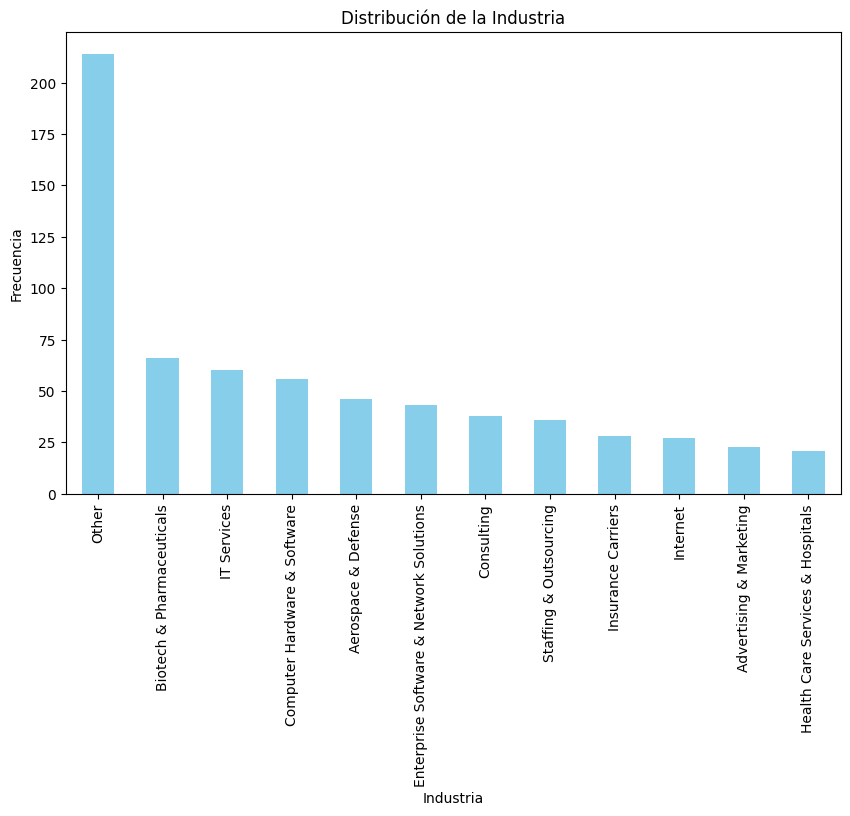

In [56]:
# Ejemplo: Distribución de la columna 'Industry'
df['Industry'].value_counts().plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Distribución de la Industria')
plt.xlabel('Industria')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()

## Grafico de dispersión

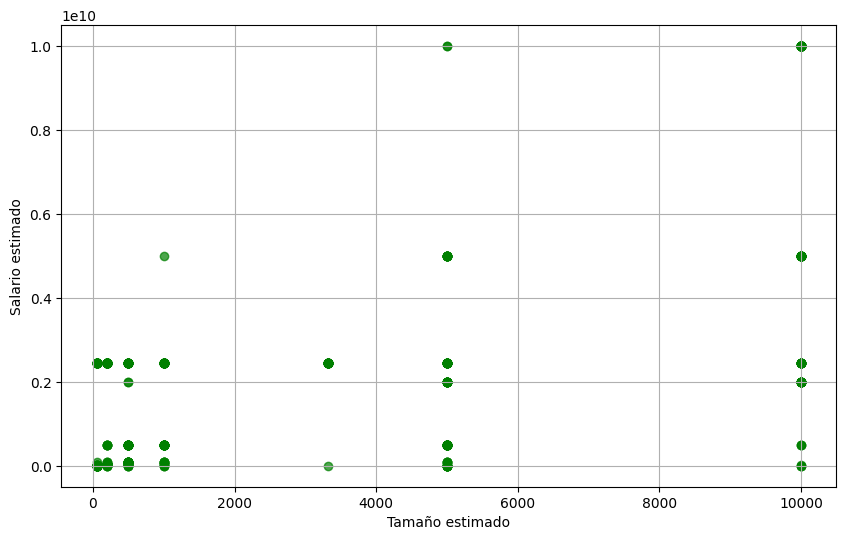

In [52]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Estimated Size'], df['Estimated Revenue'], alpha=0.7, color='green')

plt.xlabel('Tamaño estimado')
plt.ylabel('Salario estimado')
plt.grid(True)
plt.show()

### Caja de Tukey

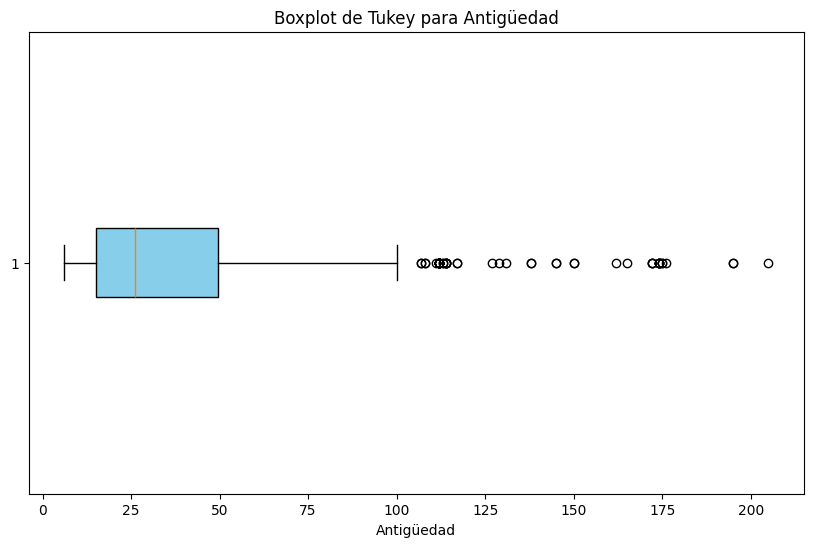

In [53]:
# Calcular los límites de Tukey
q1 = df['Antiguedad'].quantile(0.25)  # Primer cuartil
q3 = df['Antiguedad'].quantile(0.75)  # Tercer cuartil
iqr = q3 - q1  # Rango intercuartílico

# Límites para los bigotes
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filtrar valores dentro de los límites
filtered_data = df[(df['Antiguedad'] >= lower_bound) & (df['Antiguedad'] <= upper_bound)]

# Crear el boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(filtered_data['Antiguedad'], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('Boxplot de Tukey para Antigüedad')
plt.xlabel('Antigüedad')
plt.show()

Identifiqué un problema en la columna antiguedad, con algunos valores extremos mayores. Faltaria corregir eso.